Bonjour 
Vous trouverez ci-dessous notre travail concernant le TP2 de régression linéaire.
Realisé par :
Wissem Karous , 2GT2

2

In [259]:

#importation des bibliothèques nécessaires
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


3

In [260]:
#chargement du dataset
dataset = pd.read_csv("50_startups (1).csv")

4.a

In [261]:
#Les 5 premières lignes du DataFrame 
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


b

In [262]:
#nombre de lignes et de colonnes (dimensions) du DataFrame
dataset.shape

(50, 5)

In [263]:
#les informations sur les colonnes du DataFrame incluant le nombre de valeurs non nulles
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


d

In [264]:
#statistiques descriptives des variables numériques 
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


5

In [265]:
#statistiques de nombre de valuers nulles par colonne
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

6

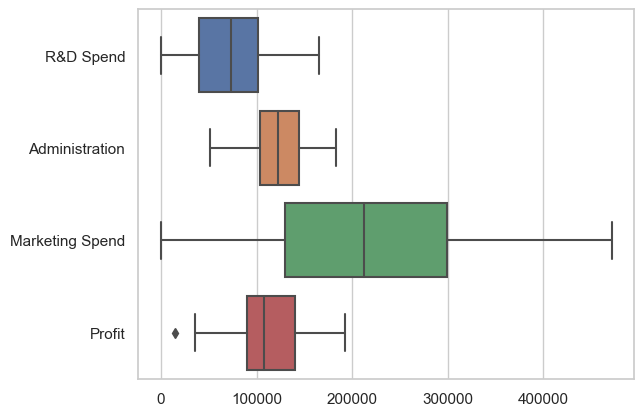

In [266]:
#visualisation des valeurs aberrantes "outliers" avec un boxplot basant sur la biblio seaborn
sns.set(style='whitegrid')
sns.boxplot(data=dataset, orient='h')
plt.show()


On constate que Profit presente une valeur abearante :<br>
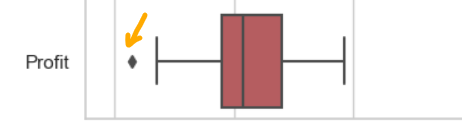

7.a

In [267]:
q1=dataset[dataset['Profit']==14681.4]
q1

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


b

In [268]:
q2=dataset[dataset['R&D Spend']==0]
q2


,R&D Spend,Administration,Marketing Spend,State,Profit
47,0.0,135426.92,0.00,California,42559.73
49,0.0,116983.80,45173.06,California,14681.40


8

In [269]:
print("8. Quantile d'ordre 0.05 pour la variable 'Profit' :", dataset['Profit'].quantile(0.05))

8. Quantile d'ordre 0.05 pour la variable 'Profit' : 45678.689000000006


9

In [270]:
# on cherche a deteremineer les valeurs aberrantes dans la variable Profit 
Q1 = dataset['Profit'].quantile(0.25)
Q3 = dataset['Profit'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

49627.07499999998


In [271]:
# on supprime les valeurs aberrantes
dataset = dataset[~((dataset['Profit'] < (Q1 - 1.5 * IQR)) | (dataset['Profit'] > (Q3 + 1.5 * IQR)))]

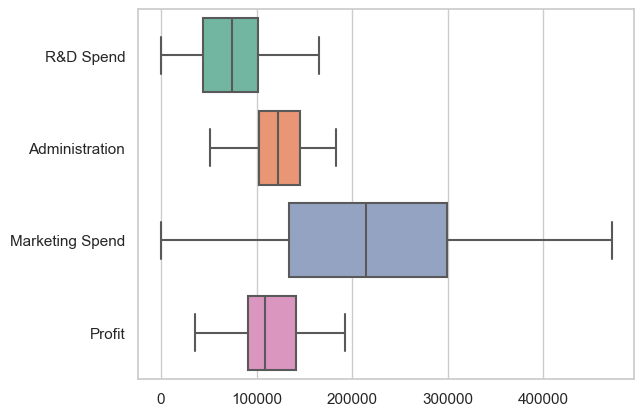

In [272]:
# on affiche le boxplot de la variable Profit
sns.boxplot(data=dataset, orient="h", palette="Set2")
plt.show()

In [273]:
#verification des valeurs aberant  après suppression des outliers de valeur 14681.4        
dataset[dataset['Profit']==14681.4]

,R&D Spend,Administration,Marketing Spend,State,Profit


['Profit']==14681.4 is a outlier

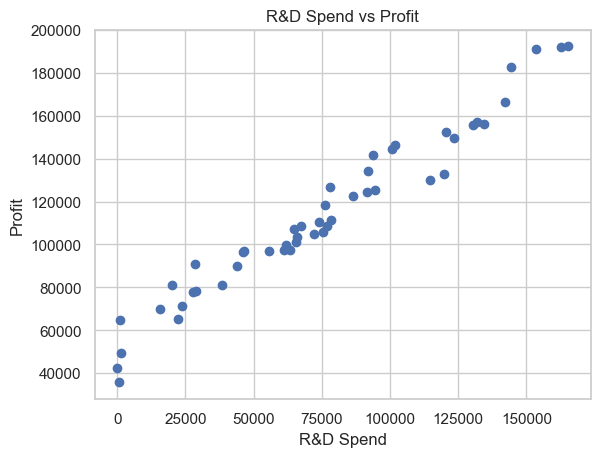

In [274]:
#utilisation de scatter plot pour visualiser la relation entre R&D Spend et Profit 
plt.scatter(dataset['R&D Spend'], dataset['Profit'])
plt.title('R&D Spend vs Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()


Ce que clair que la realtion entre R&D vs Profit est linear 

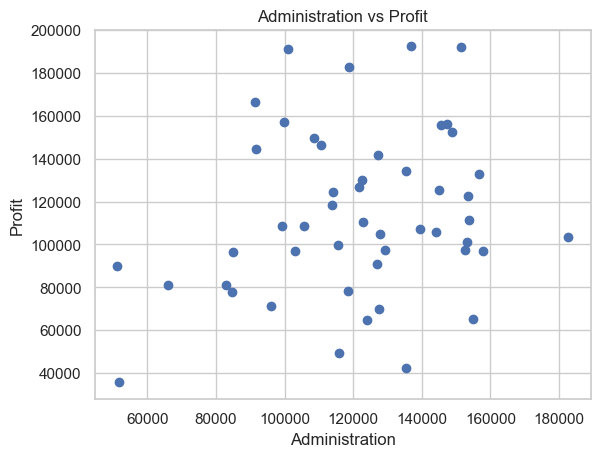

In [275]:
# utilisation de scatter plot pour visualiser la relation entre admin  et Profit
plt.scatter(dataset['Administration'], dataset['Profit'])
plt.title('Administration vs Profit')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()


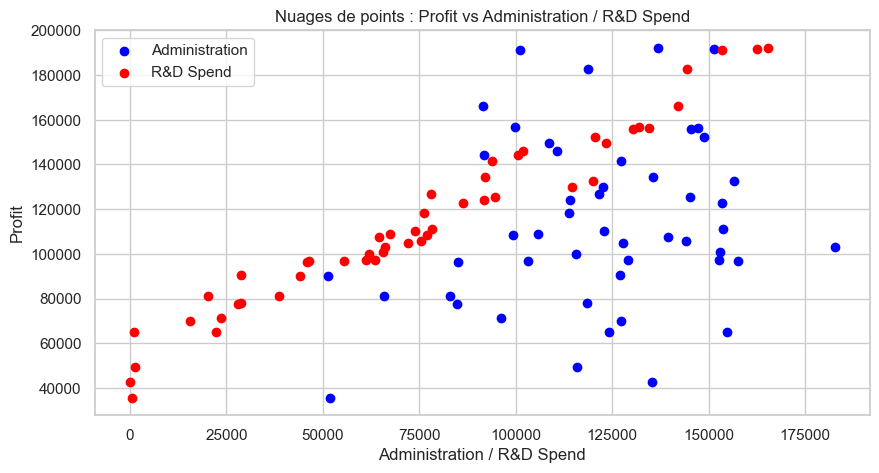

In [276]:

# Tracer les nuages de points de Profit en fonction de R&D Spend et Administration
plt.figure(figsize=(10, 5))
plt.scatter(dataset['Administration'], dataset['Profit'], color='blue', label='Administration')
plt.scatter(dataset['R&D Spend'], dataset['Profit'], color='red', label='R&D Spend')
plt.xlabel('Administration / R&D Spend')
plt.ylabel('Profit')
plt.title('Nuages de points : Profit vs Administration / R&D Spend')
plt.legend()
plt.show()

10

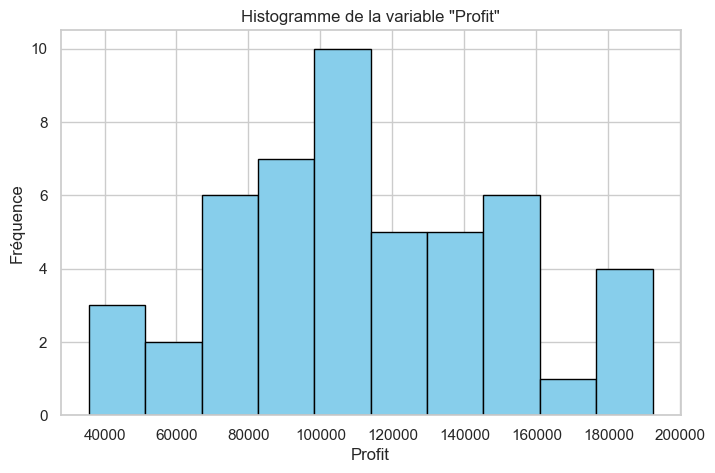

In [277]:
# Tracer l'histogramme de la variable 'Profit'
plt.figure(figsize=(8, 5))
plt.hist(dataset['Profit'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Profit')
plt.ylabel('Fréquence')
plt.title('Histogramme de la variable "Profit"')
plt.show()

11

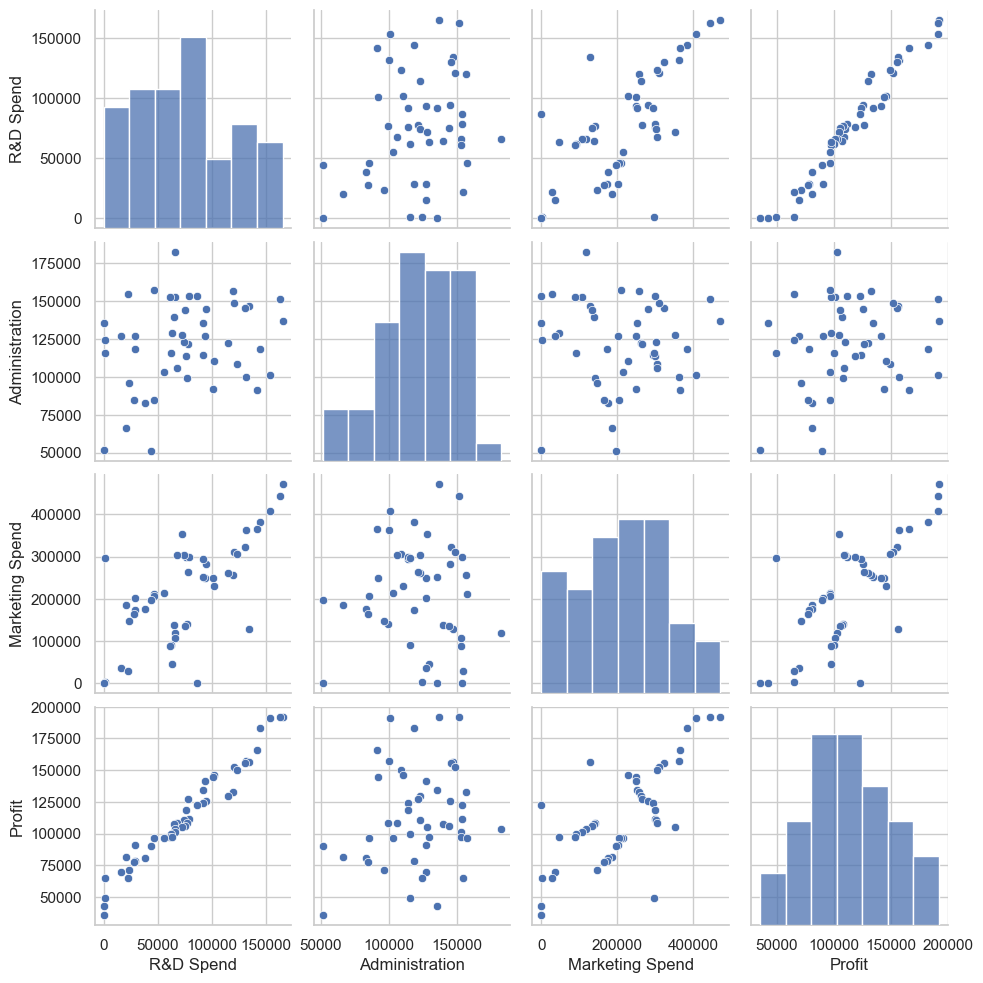

In [278]:
sns.pairplot(dataset)
plt.show()

12

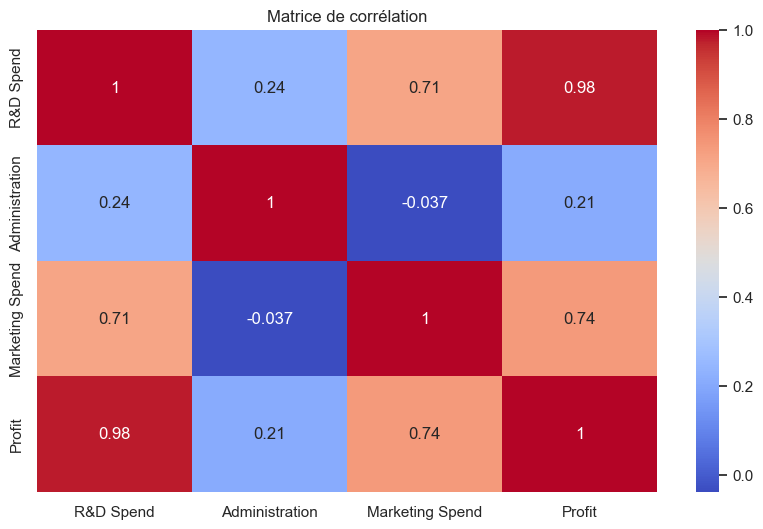

In [279]:
# Exclure les variables catégorielles de la matrice de corrélation
numeric_dataset = dataset.drop(columns=['State'])

# Calculer la matrice de corrélation de Pearson
correlation_matrix = numeric_dataset.corr()

# Afficher la matrice de corrélation sous forme de carte thermique
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

13

In [280]:
#check data types
dataset.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [281]:
from sklearn.preprocessing import LabelEncoder
dataset1=dataset.copy()
# Créer une instance de LabelEncoder
label_encoder = LabelEncoder()

# Ajuster et transformer la colonne 'State'
encoded_state = label_encoder.fit_transform(dataset1['State'])

# Remplacer la colonne 'State' par la nouvelle colonne encodée dans le dataset
dataset1['State'] = encoded_state

# Afficher les cinq premières lignes de la matrice des variables explicatives après cet encodage
print("Les cinq premières lignes de la matrice des variables explicatives après l'encodage de 'State':")
dataset1.head()


Les cinq premières lignes de la matrice des variables explicatives après l'encodage de 'State':


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


L'idée derrière le label encoding est d'attribuer des indices aux variables catégorielles. Toutefois, cette méthode peut s'avérer inappropriée dans certains cas, notamment avec des modèles basés sur le calcul de distances.

14

In [282]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Créer une instance de OneHotEncoder
onehot_encoder = OneHotEncoder()
dataset2=dataset.copy()
# Créer le ColumnTransformer pour appliquer le OneHotEncoder sur la colonne 'State'
column_transformer = ColumnTransformer([('encoder', onehot_encoder, [3])], remainder='passthrough')

# Appliquer le ColumnTransformer sur le dataset
transformed_data = column_transformer.fit_transform(dataset2)

# Afficher les cinq premières lignes du dataset transformé
print("Les cinq premières lignes du dataset après transformation avec OneHotEncoder:")

# Créer un DataFrame à partir du dataset transformé
transformed_dataset = pd.DataFrame(transformed_data)
#renommer les colonnes
transformed_dataset.columns = ['State1', 'State2', 'State3', 'R&D Spend', 'Administration', 'Marketing Spend', 'Profit']
transformed_dataset.head()
#eliminer la colonne State1
transformed_dataset.drop(columns=['State1'], inplace=True)
transformed_dataset.head()
# changer la position de la colonne state 3 et 2 a juste avant la colonne profit
columns_titles = [ 'R&D Spend', 'Administration', 'Marketing Spend','State2', 'State3', 'Profit']
transformed_dataset = transformed_dataset.reindex(columns=columns_titles)
dataset2=transformed_dataset.copy()
dataset2.head()

Les cinq premières lignes du dataset après transformation avec OneHotEncoder:


,R&D Spend,Administration,Marketing Spend,State2,State3,Profit
0,165349.20,136897.80,471784.10,0.0,1.0,192261.83
1,162597.70,151377.59,443898.53,0.0,0.0,191792.06
2,153441.51,101145.55,407934.54,1.0,0.0,191050.39
3,144372.41,118671.85,383199.62,0.0,1.0,182901.99
4,142107.34,91391.77,366168.42,1.0,0.0,166187.94


15

In [283]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [284]:
#encodage des variables catégorielles avec la fonction get_dummies
dataset3=dataset.copy()
dataset3 = pd.get_dummies(dataset3, drop_first=True)
dataset3.head()


,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,True
1,162597.70,151377.59,443898.53,191792.06,False,False
2,153441.51,101145.55,407934.54,191050.39,True,False
3,144372.41,118671.85,383199.62,182901.99,False,True
4,142107.34,91391.77,366168.42,166187.94,True,False


In [285]:
#reindexer les colonnes pour avoir la colonne profit en dernier
columns_titles = ['R&D Spend', 'Administration', 'Marketing Spend', 'State_Florida', 'State_New York', 'Profit']
dataset3 = dataset3.reindex(columns=columns_titles)
dataset3.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York,Profit
0,165349.20,136897.80,471784.10,False,True,192261.83
1,162597.70,151377.59,443898.53,False,False,191792.06
2,153441.51,101145.55,407934.54,True,False,191050.39
3,144372.41,118671.85,383199.62,False,True,182901.99
4,142107.34,91391.77,366168.42,True,False,166187.94


In [286]:
# Importer train_test_split
from sklearn.model_selection import train_test_split
# Diviser le dataset en variables explicatives et variable cible
X = dataset3.iloc[:, :-1]
y = dataset3.iloc[:, -1]
# Diviser le dataset en un ensemble d'entraînement et un ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Afficher les dimensions des ensembles d'entraînement et de test
print("Dimensions de l'ensemble d'entraînement :", X_train.shape, y_train.shape)

Dimensions de l'ensemble d'entraînement : (39, 5) (39,)


mise à echelle

In [287]:
from sklearn.preprocessing import StandardScaler

# Créer une instance de StandardScaler
scaler = StandardScaler()

# Adapter le scaler aux données d'entraînement et le transformer
X_train_scaled = scaler.fit_transform(X_train)

# Transformer les données de test en utilisant le scaler adapté aux données d'entraînement
X_test_scaled = scaler.transform(X_test)


In [288]:
# Importer LinearRegression
from sklearn.linear_model import LinearRegression

# Créer une instance de LinearRegression
model = LinearRegression()

# Entraîner le modèle sur les données d'apprentissage
model.fit(X_train_scaled, y_train)

LinearRegression()

16

In [289]:
# Coefficients de régression
coefficients = model.coef_
intercept = model.intercept_
# Afficher les résultats
print("Coefficients de régression :", coefficients)
print("Ordonnée à l'origine :", intercept)

# Afficher l'expression du modèle
print("Expression du modèle de régression linéaire:")
print("Profit = ", intercept, "\n + ", coefficients[0], " * R&D Spend", "\n + ", coefficients[1], " * Administration", "\n + ", coefficients[2], " * Marketing Spend", "\n + ", coefficients[3], " * State_Florida", "\n + ", coefficients[4], " * State_New York")

Coefficients de régression : [37220.51002112  -838.17412019  2650.2026105   -485.50834266
  -940.65198334]
Ordonnée à l'origine : 114073.91307692308
Expression du modèle de régression linéaire:
Profit =  114073.91307692308 
 +  37220.51002112201  * R&D Spend 
 +  -838.174120193861  * Administration 
 +  2650.202610498223  * Marketing Spend 
 +  -485.50834265597985  * State_Florida 
 +  -940.6519833424176  * State_New York


17

In [290]:
# Prédire les valeurs des données de test
y_pred = model.predict(X_test_scaled)

# Comparer les valeurs prédites aux valeurs réelles
comparison = pd.DataFrame({'Valeur réelle': y_test, 'Valeur prédite': y_pred})
print(comparison)

    Valeur réelle  Valeur prédite
29      101004.64   102338.503618
4       166187.94   171535.201604
26      105733.54   111765.564075
30       99937.59   101103.496591
32       97427.84   101932.715588
37       89949.14    92134.461493
34       96712.80    91033.642855
40       78239.91    77347.989426
7       155752.60   159561.410833
10      146121.95   136002.841289


18

In [291]:
# Importer les métriques
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculer les métriques
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Afficher les résultats
print("MSE :", mse)
print("MAE :", mae)
print("RMSE :", rmse)
print("R² :", r2)


MSE : 24313833.477661997
MAE : 4106.825023117376
RMSE : 4930.90594897753
R² : 0.9709286293284102


Ce qui est clair, c'est que seul le R carré a une signification par rapport aux autres métriques.

19

Les méthodes de régularisation L1 et L2 sont des techniques couramment utilisées pour éviter le surapprentissage dans les modèles de machine learning, en particulier dans le contexte de la régression linéaire et de la régression logistique.

In [292]:
# Importer Ridge et Lasso
from sklearn.linear_model import Ridge, Lasso


Ridge

In [293]:
# Créer une instance de Ridge
ridge_model = Ridge()

# Entraîner le modèle Ridge
ridge_model.fit(X_train, y_train)

# Prédire les valeurs avec Ridge
y_pred_ridge = ridge_model.predict(X_test)

In [294]:
# Calculer les métriques avec Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Afficher les résultats avec Ridge
print("Ridge - MSE :", mse_ridge)
print("Ridge - MAE :", mae_ridge)
print("Ridge - RMSE :", rmse_ridge)
print("Ridge - R² :", r2_ridge)

Ridge - MSE : 24521106.20563084
Ridge - MAE : 4152.448615710654
Ridge - RMSE : 4951.879058057742
Ridge - R² : 0.9706807991246527


Lasso

In [295]:
# Faire de même avec Lasso
# Créer une instance de Lasso
lasso_model = Lasso()

# Entraîner le modèle Lasso
lasso_model.fit(X_train, y_train)

# Prédire les valeurs avec Lasso
y_pred_lasso = lasso_model.predict(X_test)



In [296]:
# Calculer les métriques avec Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Afficher les résultats avec Lasso
print("Lasso - MSE :", mse_lasso)
print("Lasso - MAE :", mae_lasso)
print("Lasso - RMSE :", rmse_lasso)
print("Lasso - R² :", r2_lasso)


Lasso - MSE : 24322365.713443793
Lasso - MAE : 4108.818984149215
Lasso - RMSE : 4931.771052415531
Lasso - R² : 0.9709184275727184


On constate que il y a pas de grand diff entre les resultats et les metrics realisés par rapport les resultat sans regularisation 

20

In [297]:
# utlisation de stats model pour afficher les statistiques du model basé sur les p-values 
import statsmodels.api as sm
X=np.append(arr=np.ones((49,1)), values=X, axis=1)
X=X.astype('float64')
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     216.6
Date:                Fri, 03 May 2024   Prob (F-statistic):           2.51e-29
Time:                        09:59:20   Log-Likelihood:                -505.97
No. Observations:                  49   AIC:                             1024.
Df Residuals:                      43   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.338e+04   5794.239      9.212      0.000    4.17e+04    6.51e+04
x1             0.7836      0.039     20.056      0.000       0.705       0.862
x2            -0.0220      0.044     -0.505      0.616      -0.110       0.066
x3             0.0258      0.014      1.804      0.078      -0.003       0.055
x4         -1564.2242   2842.017     -0.550      0.585   -7295.698    4167.249
x5         -1954.0177   2751.932     -0.710      0.482   -7503.818    3595.783
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.207
Skew:                           0.061   Prob(JB):                        0.902
Kurtosis:                       2.705   Cond. No.                     1.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [298]:
import statsmodels.api as sm
X_opt = X[:, [0, 1, 3, 4, 5]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     275.3
Date:                Fri, 03 May 2024   Prob (F-statistic):           1.60e-30
Time:                        09:59:20   Log-Likelihood:                -506.11
No. Observations:                  49   AIC:                             1022.
Df Residuals:                      44   BIC:                             1032.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.081e+04   2738.498     18.553      0.000    4.53e+04    5.63e+04
x1             0.7760      0.036     21.721      0.000       0.704       0.848
x2             0.0281      0.013      2.082      0.043       0.001       0.055
x3         -1616.5483   2815.974     -0.574      0.569   -7291.770    4058.674
x4         -1941.2724   2728.415     -0.712      0.481   -7440.031    3557.487
==============================================================================
Omnibus:                        0.123   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.940   Jarque-Bera (JB):                0.292
Skew:                           0.093   Prob(JB):                        0.864
Kurtosis:                       2.670   Cond. No.                     8.83e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

RMQ: apres l'elimination de feature 2 on constate que l Adj. R-squared presnete une amelioration 

In [299]:
import statsmodels.api as sm
X_opt = X[:, [0, 1, 3, 4]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     371.0
Date:                Fri, 03 May 2024   Prob (F-statistic):           9.80e-32
Time:                        09:59:20   Log-Likelihood:                -506.39
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.99e+04   2408.191     20.720      0.000     4.5e+04    5.47e+04
x1             0.7747      0.035     21.832      0.000       0.703       0.846
x2             0.0281      0.013      2.093      0.042       0.001       0.055
x3          -606.2137   2418.350     -0.251      0.803   -5477.020    4264.593
==============================================================================
Omnibus:                        0.046   Durbin-Watson:                   1.552
Prob(Omnibus):                  0.977   Jarque-Bera (JB):                0.228
Skew:                          -0.034   Prob(JB):                        0.892
Kurtosis:                       2.673   Cond. No.                     6.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [300]:
import statsmodels.api as sm
X_opt = X[:, [0, 1, 3]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Fri, 03 May 2024   Prob (F-statistic):           3.74e-33
Time:                        09:59:20   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
x1             0.7754      0.035     22.136      0.000       0.705       0.846
x2             0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

On se basant sur les valeur de p value et methode satestique on a fait feature selection , avec ces features le model atteint le max de performance !

<Merci de votre Attention !>